In [1]:
from collections import defaultdict

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader, TensorDataset, Subset
from torchvision.datasets import MNIST
from torchvision import transforms

In [2]:
import time
from utils import show_img, extract_patches, display_patches
import inference
from sparseCoding import learn_representations

In [3]:
MEAN = 0.1307
STD = 0.3081
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(MEAN, STD)])
mnist = MNIST(root='./data', train=True, download=True, transform=transform)
train = Subset(mnist, indices=range(len(mnist) // 100))
train_loader = DataLoader(train, batch_size=1, shuffle=False)

SANITY CHECK

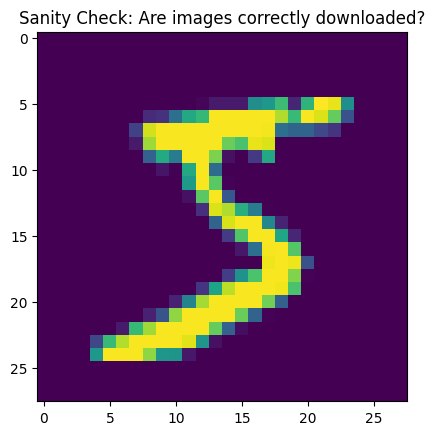

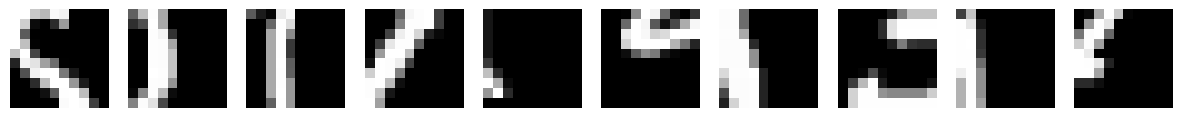

In [4]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
img_grid = torchvision.utils.make_grid(images)
show_img(img_grid, MEAN, STD)
patches = extract_patches(train)
display_patches(patches)

In [6]:
times = defaultdict(lambda: 0)

# for i, data in enumerate(train_loader):
#     data = data[0].squeeze().flatten()
#     D = torch.randn((784, 784))

#     start = time.time()
#     h1 = inference.ISTA(data, 784, D)
#     times['ista'] += time.time() - start
    
#     if i % 100 == 0:
#         print(i)

# print(f"Average time taken in ISTA = {times['ista']/len(train_loader)}")

# for i, data in enumerate(train_loader):
#     data = data[0].squeeze().flatten()
#     D = torch.randn((784, 784))
    
#     start = time.time()
#     h2 = inference.FISTA(data, 784, D)
#     times['fista'] += time.time() - start
    
#     if i % 100 == 0:
#         print(i)

# print(f"Average time taken in FISTA = {times['fista']/len(train_loader)}")

for i, data in enumerate(train_loader):
    data = data[0].squeeze().flatten()
    D = torch.randn((784, 784))
    
    start = time.time()
    h3 = inference.CoD(data, 784, D, frequency=50)
    times['coordinate_descent'] += time.time() - start
    
    if i % 100 == 0:
        print(i)

print(f"Average time taken in Coordinate Descent = {times['coordinate_descent']/len(train_loader)}")

Coordinate Descent iteration 0: change=17288.45703125
0
Coordinate Descent iteration 0: change=17382.078125
Coordinate Descent iteration 0: change=14507.048828125
Coordinate Descent iteration 0: change=14508.41015625
Coordinate Descent iteration 0: change=16144.8125
Coordinate Descent iteration 0: change=16598.1171875
Coordinate Descent iteration 0: change=14615.7099609375
Coordinate Descent iteration 0: change=19436.85546875
Coordinate Descent iteration 0: change=12820.8544921875
Coordinate Descent iteration 0: change=16083.923828125
Coordinate Descent iteration 0: change=18390.6875
Coordinate Descent iteration 0: change=12871.896484375
Coordinate Descent iteration 0: change=18494.18359375
Coordinate Descent iteration 0: change=17013.78515625
Coordinate Descent iteration 0: change=12265.85546875
Coordinate Descent iteration 0: change=16800.38671875
Coordinate Descent iteration 0: change=16212.8388671875
Coordinate Descent iteration 0: change=16858.357421875
Coordinate Descent iteratio

KeyboardInterrupt: 